In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})
rcParams['figure.figsize'] = 22.14,16.54


%matplotlib inline

In [7]:
orders_path = "/content/drive/MyDrive/Datathon2022/data/olist_orders_dataset.csv"
leads_path = "/content/drive/MyDrive/Datathon2022/data/olist_marketing_qualified_leads_dataset.csv"
new_customers_path = "/content/drive/MyDrive/Datathon2022/data/olist_closed_deals_dataset.csv"

In [8]:
mql = pd.read_csv(leads_path, parse_dates=['first_contact_date'])
cd = pd.read_csv(new_customers_path, parse_dates=['won_date'])

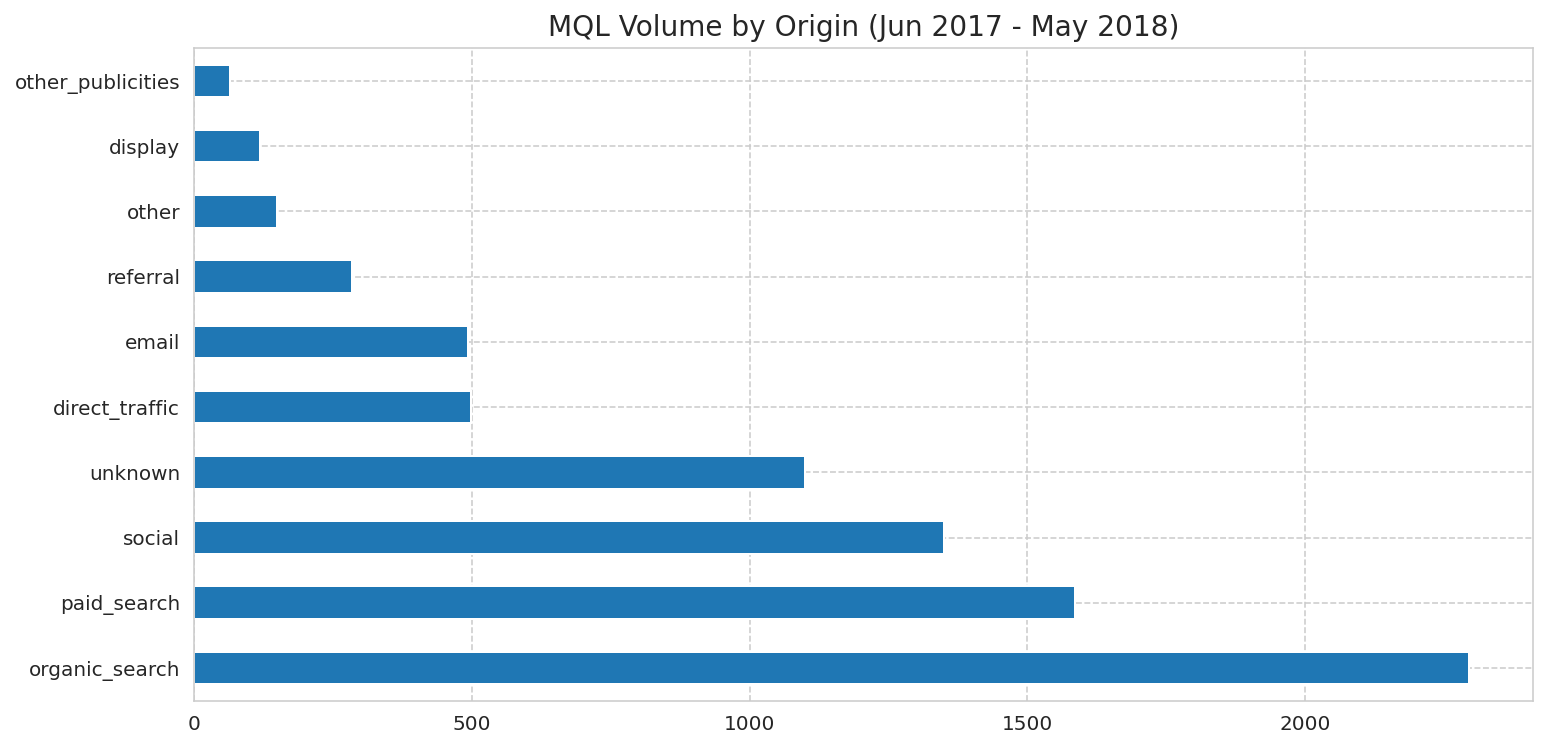

In [70]:
mql.origin.value_counts().plot(kind='barh',figsize=(12, 6))
plt.title('MQL Volume by Origin (Jun 2017 - May 2018)', fontsize=14);

In [10]:
# Add a 'year-month' column
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')

print(mql.shape)
mql[['first_contact_date', 'first_contact_date(y-m)']].head(3)

(8000, 5)


,first_contact_date,first_contact_date(y-m)
0,2018-02-01,2018-02
1,2017-10-20,2017-10
2,2018-03-22,2018-03


In [11]:
# Create time series table
monthly_mql = mql.groupby(by='first_contact_date(y-m)').mql_id \
                                                       .count()
monthly_mql.to_frame().T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
mql_id,4,239,386,312,416,445,200,1141,1028,1174,1352,1303


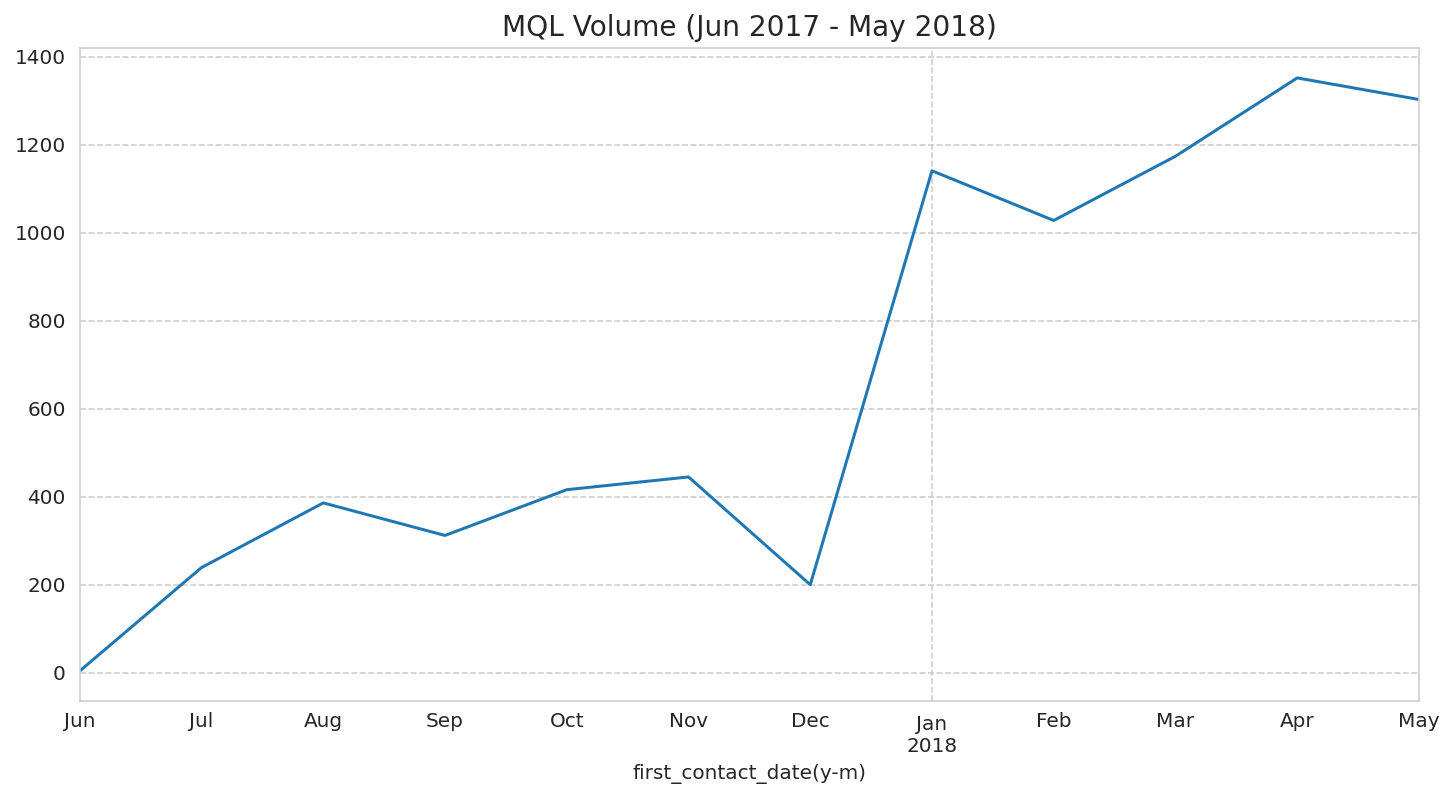

In [69]:
# Plot the monthly MQL volume
monthly_mql.plot.line(figsize=(12, 6))
plt.title('MQL Volume (Jun 2017 - May 2018)', fontsize=14);


In [13]:
# Create 'channel-time series' table
mql_origin = pd.pivot_table(mql,
                            index='origin',
                            columns='first_contact_date(y-m)',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)

# Sort index from largest to smallest in volume
origin_list = mql.groupby('origin').mql_id \
                                   .count() \
                                   .sort_values(ascending=False) \
                                   .index

mql_origin = mql_origin.reindex(origin_list)
mql_origin

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,,
organic_search,0,54,122,78,125,121,60,412,291,340,349,344
paid_search,0,56,79,64,100,70,35,170,212,262,272,266
social,0,12,45,56,52,95,39,162,156,139,325,269
unknown,1,35,70,39,53,63,25,151,156,186,166,154
direct_traffic,0,16,22,22,23,26,10,82,65,80,75,78
email,1,19,24,23,30,37,12,61,68,74,50,94
referral,0,8,16,12,8,20,9,41,34,38,45,53
other,0,12,3,9,8,3,1,39,16,22,26,11
display,1,19,2,5,5,6,5,11,18,16,19,11


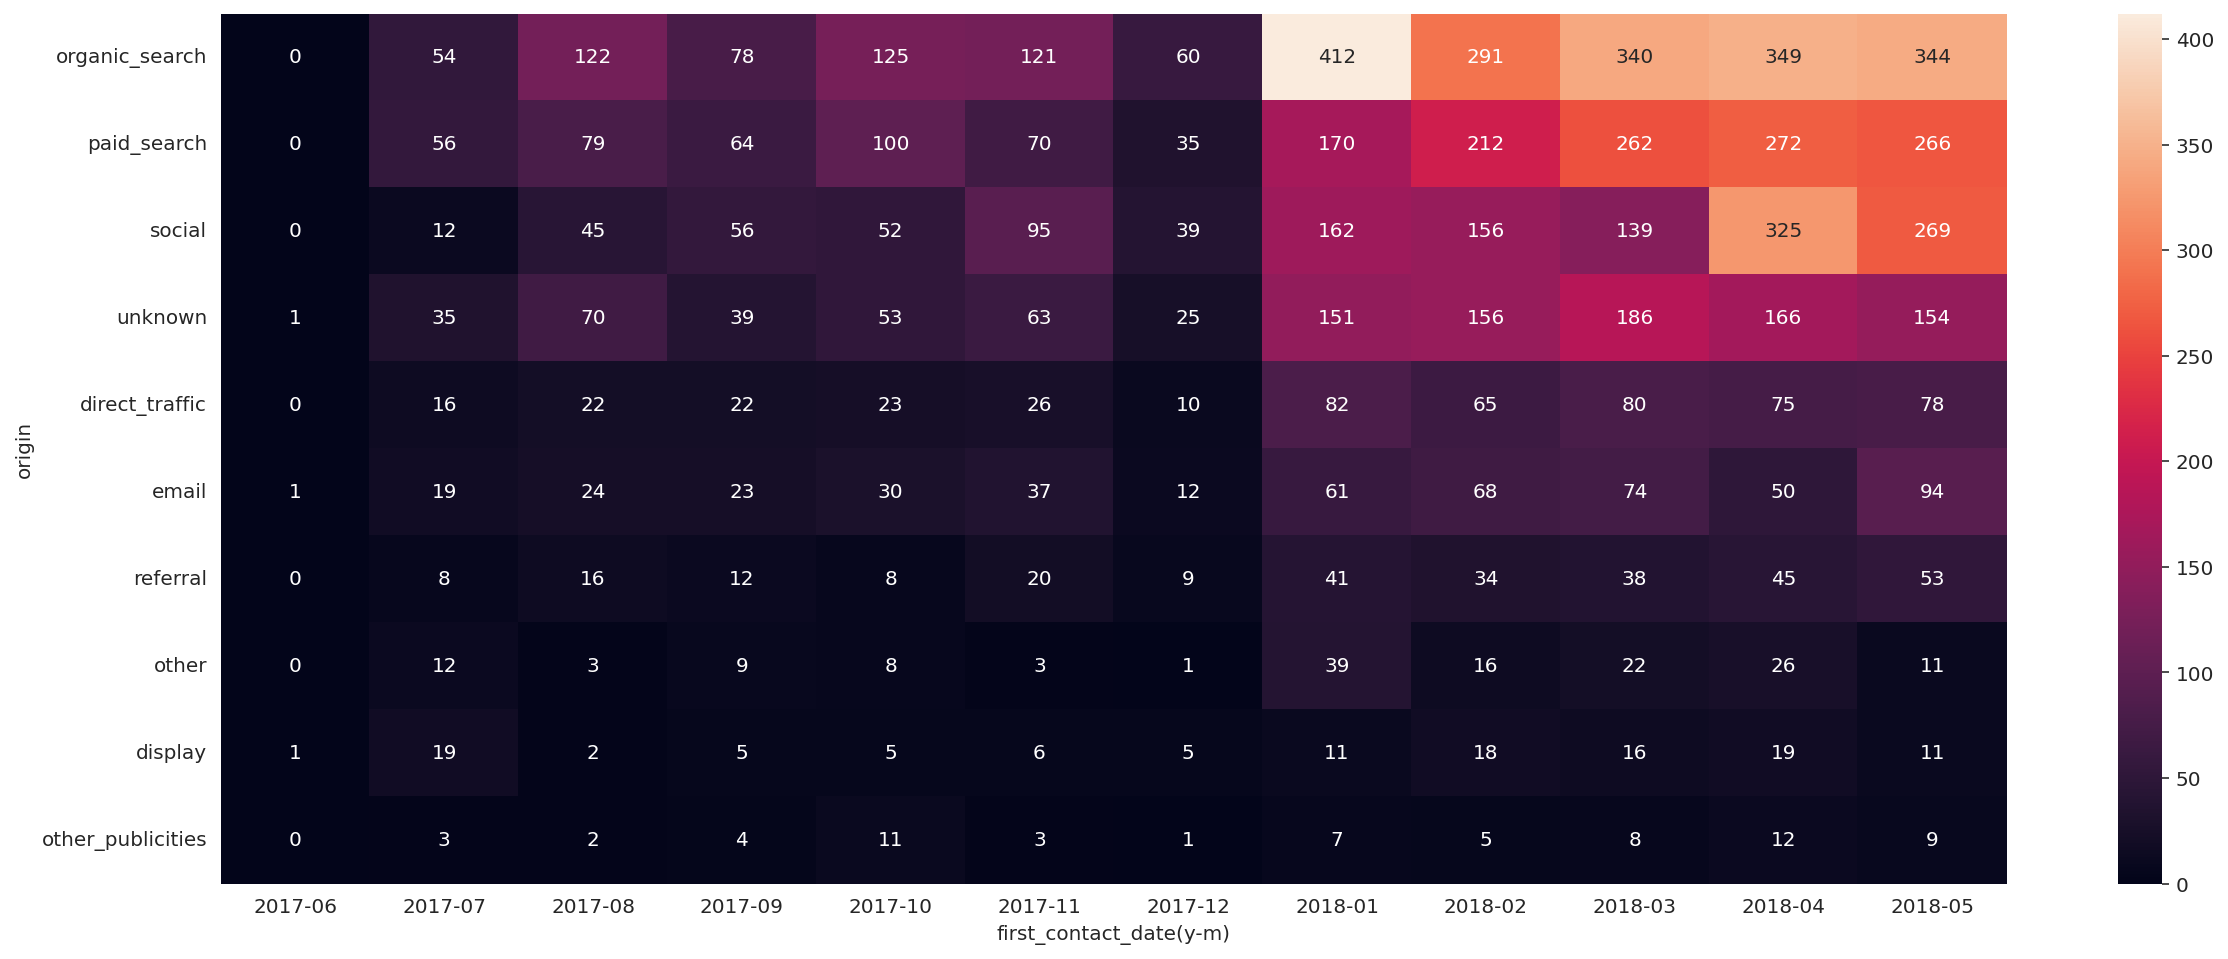

In [14]:
# Plot the monthly volume by channel
plt.figure(figsize=(20,8))
sns.heatmap(mql_origin, annot=True, fmt='g');

In [15]:
# Merge 'Closed Deals' with 'MQL'
cd_mql = pd.merge(cd,
                  mql,
                  how='left',
                  on='mql_id')

print(cd_mql.shape)
cd_mql.head(3)

(842, 18)


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,first_contact_date(y-m)
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018-02
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,2018-04
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,2018-04


In [16]:
# Create 'channel-time series' table
mql_cd_origin = pd.pivot_table(cd_mql,
                            index='business_type',
                            columns='first_contact_date(y-m)',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)

# Sort index from largest to smallest in volume
cd_origin_list = cd_mql.groupby('business_type').mql_id \
                                   .count() \
                                   .sort_values(ascending=False) \
                                   .index

mql_cd_origin = mql_cd_origin.reindex(cd_origin_list)
mql_cd_origin

first_contact_date(y-m),2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
business_type,,,,,,,,,,,
reseller,1,6,5,9,13,8,106,107,114,126,92
manufacturer,1,3,2,5,5,3,43,40,52,52,36
other,0,0,0,0,0,0,1,1,0,1,0


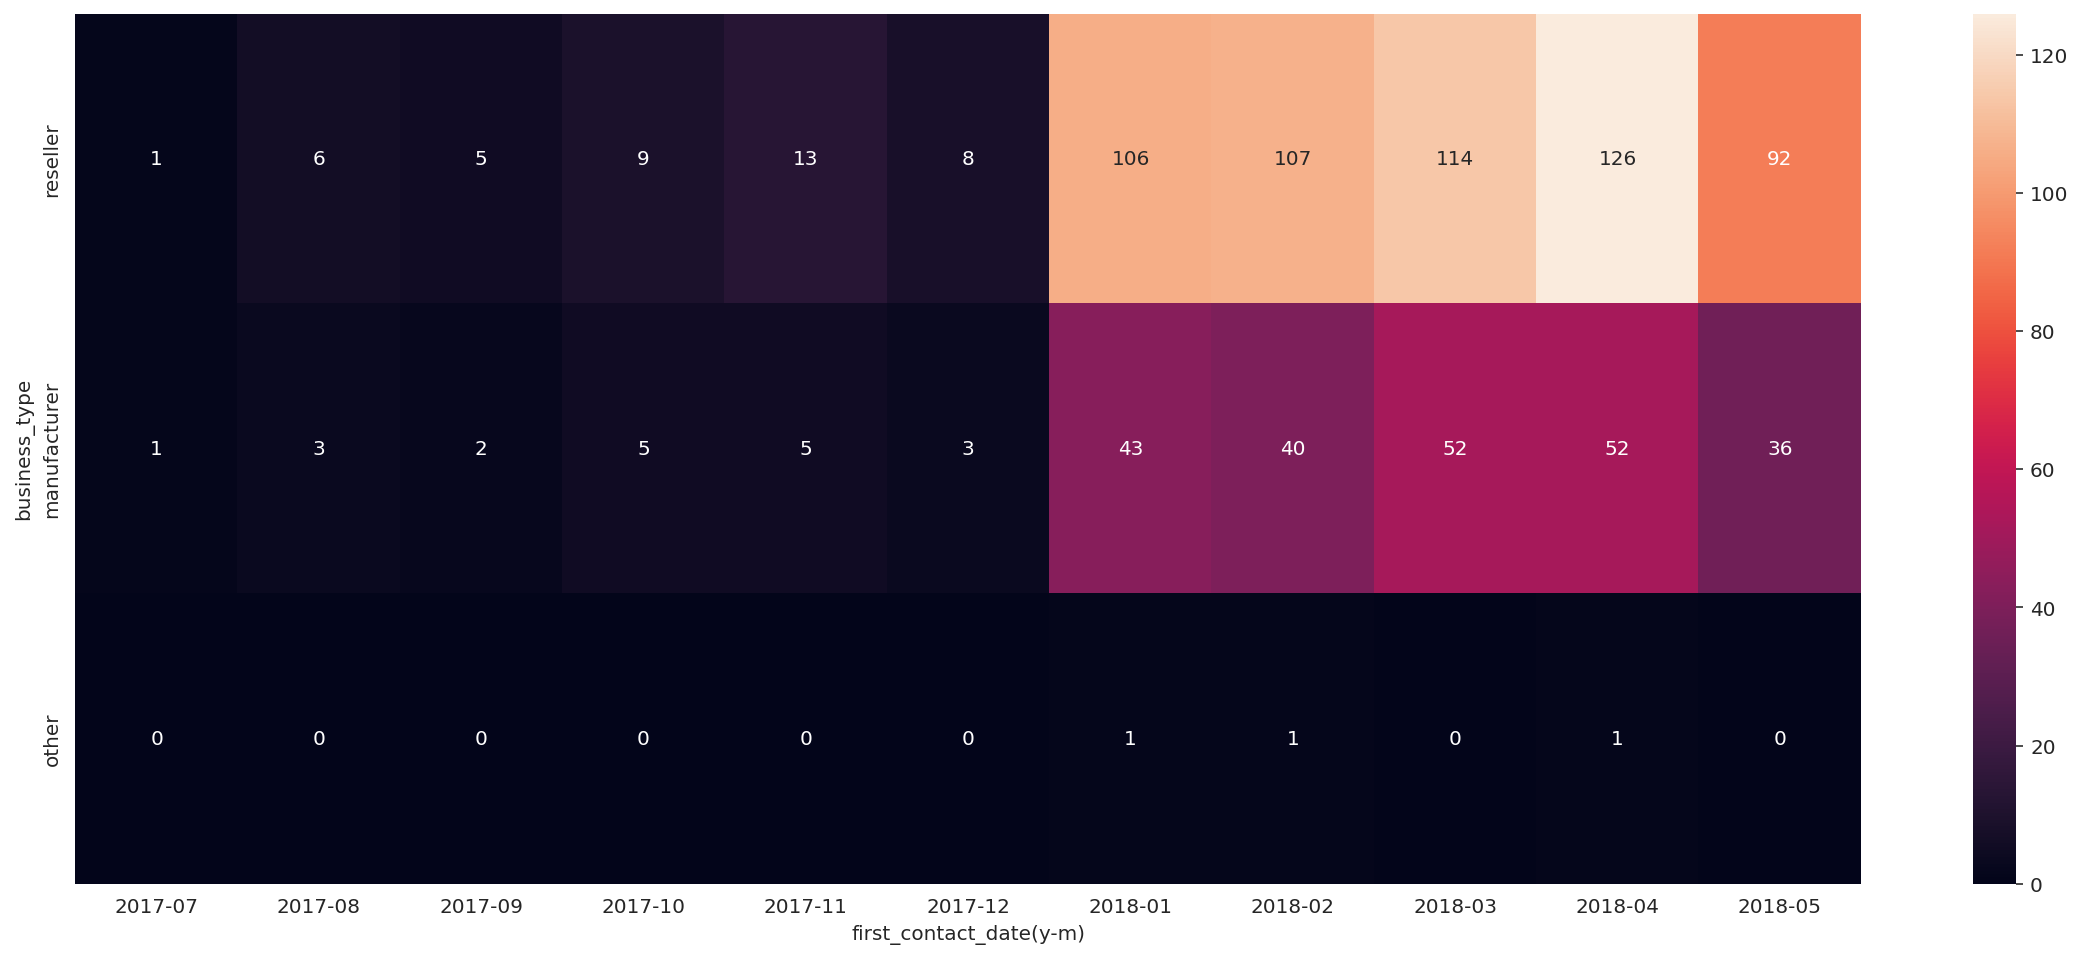

In [17]:
# Plot the monthly volume by channel
plt.figure(figsize=(20,8))
sns.heatmap(mql_cd_origin, annot=True, fmt='g');

In [18]:
# Merge 'MQL' with 'closed deals'
# Merge by 'left' in order to evaluate conversion rate
mql_cd = pd.merge(mql,
                  cd,
                  how='left',
                  on='mql_id')

print(mql_cd.shape)
mql_cd.head(3)

(8000, 18)


,mql_id,first_contact_date,landing_page_id,origin,first_contact_date(y-m),seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018-02,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017-10,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018-03,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Add a column to distinguish signed MOLs from MQLs who left without signing up
mql_cd['seller_id(bool)'] = mql_cd['seller_id'].notna()

print(mql_cd.shape)
mql_cd[['seller_id', 'seller_id(bool)']].head()

(8000, 19)


,seller_id,seller_id(bool)
0,NaN,False
1,NaN,False
2,NaN,False
3,NaN,False
4,2c43fb513632d29b3b58df74816f1b06,True


In [20]:
# Compute monthly closed deals
monthly_cd = mql_cd.groupby('first_contact_date(y-m)')['seller_id(bool)'].sum()
monthly_cd.to_frame().T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
seller_id(bool),0,2,9,7,14,18,11,152,149,167,183,130


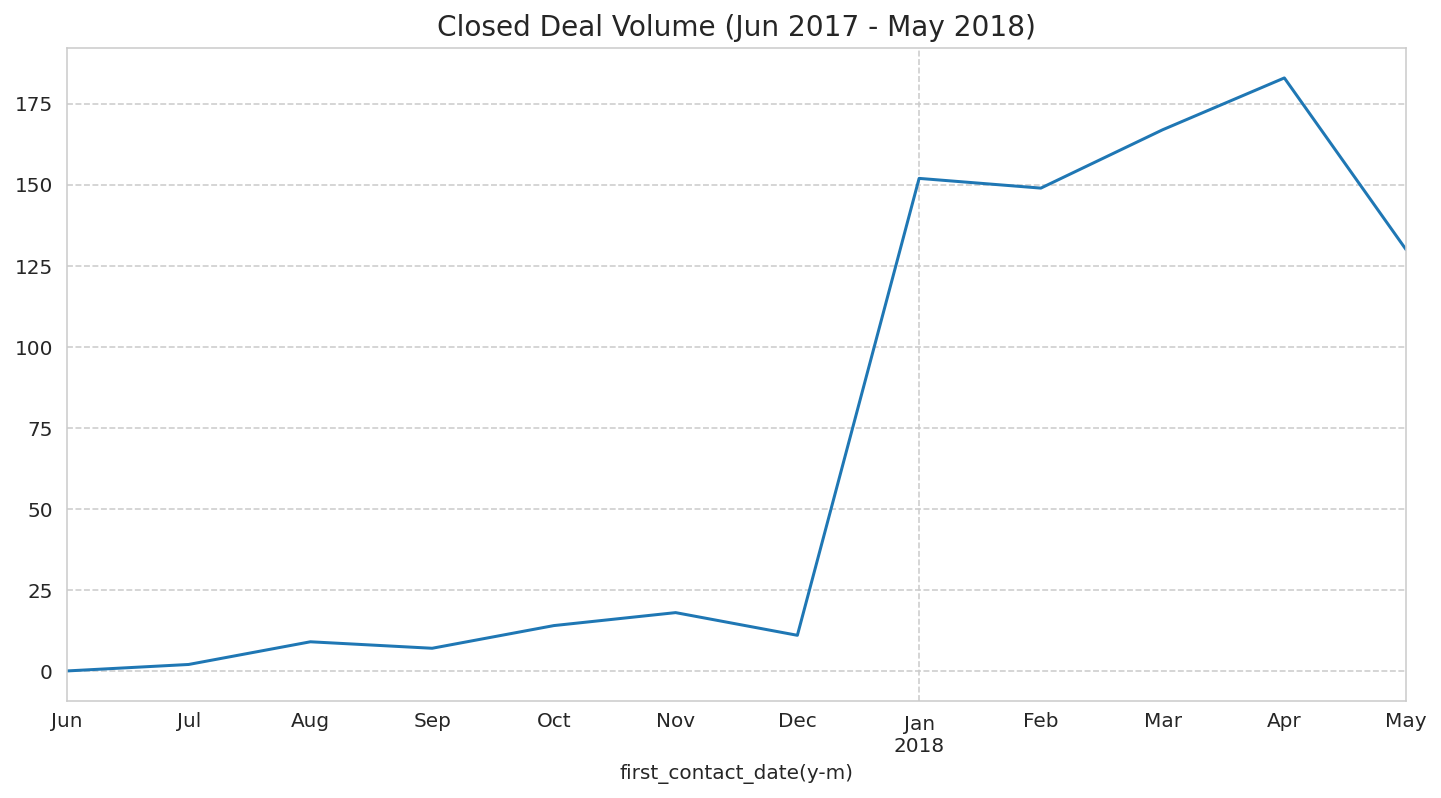

In [21]:
# Plot the monthly volume of closed deals
monthly_cd.plot.line(figsize=(12, 6))
plt.title('Closed Deal Volume (Jun 2017 - May 2018)', fontsize=14);

In [22]:
# Calculate monthly conversion rate
monthly_conversion = mql_cd.groupby(by='first_contact_date(y-m)')['seller_id(bool)'].agg(['count', 'sum'])

monthly_conversion['conversion_rate(%)'] = ((monthly_conversion['sum'] / monthly_conversion['count']) * 100).round(1)
monthly_conversion.T

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
count,4.0,239.0,386.0,312.0,416.0,445.0,200.0,1141.0,1028.0,1174.0,1352.0,1303.0
sum,0.0,2.0,9.0,7.0,14.0,18.0,11.0,152.0,149.0,167.0,183.0,130.0
conversion_rate(%),0.0,0.8,2.3,2.2,3.4,4.0,5.5,13.3,14.5,14.2,13.5,10.0


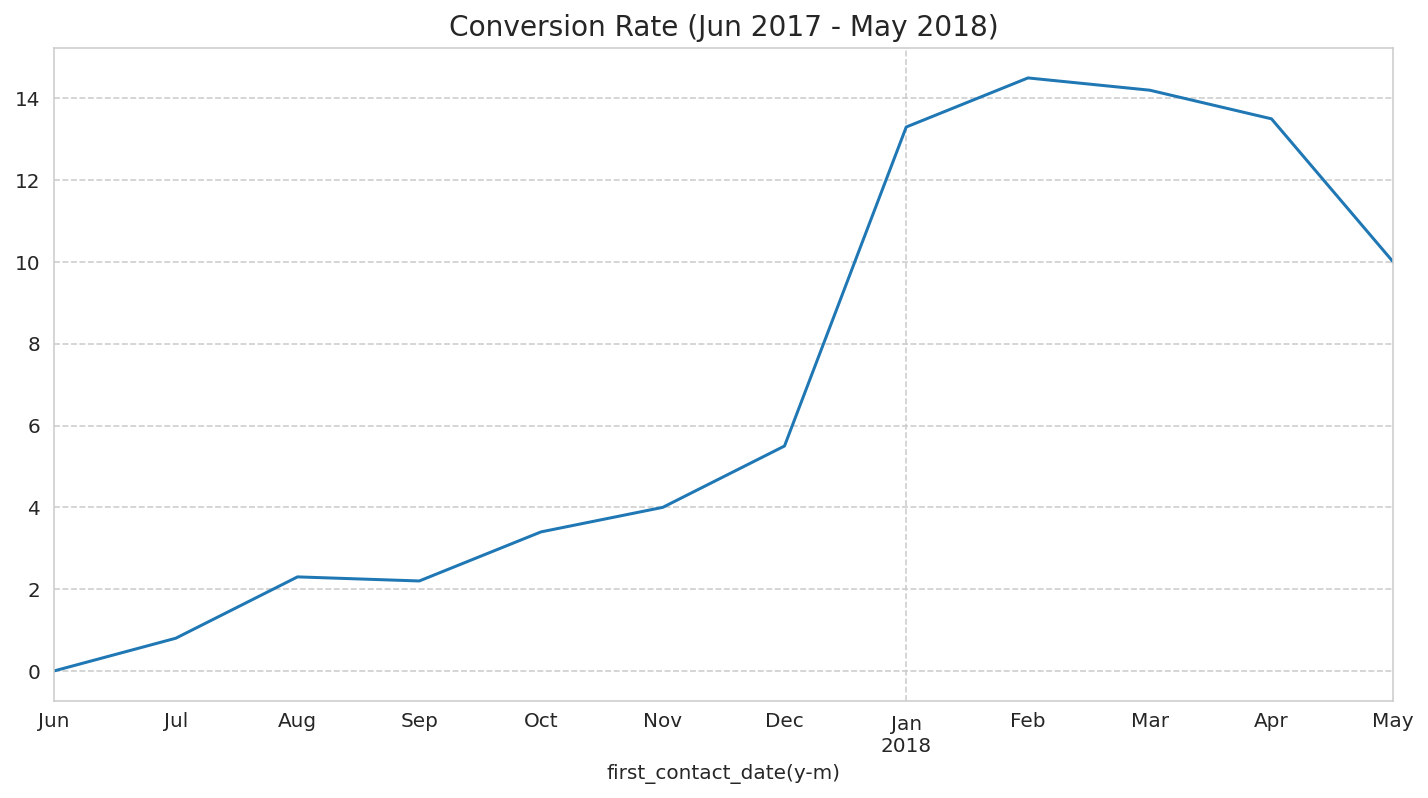

In [23]:
# Plot the monthly conversion rate
monthly_conversion['conversion_rate(%)'].plot.line(figsize=(12, 6))
plt.title('Conversion Rate (Jun 2017 - May 2018)', fontsize=14);

In [24]:
#Calculate sales length in days
mql_cd['sales_length(day)'] = np.ceil((mql_cd['won_date'] - mql_cd['first_contact_date'])
                                      .dt.total_seconds()
                                      / (60*60*24))

print(mql_cd.shape)
mql_cd[['first_contact_date', 'won_date', 'sales_length(day)']].head()

(8000, 20)


,first_contact_date,won_date,sales_length(day)
0,2018-02-01,NaT,NaN
1,2017-10-20,NaT,NaN
2,2018-03-22,NaT,NaN
3,2018-01-22,NaT,NaN
4,2018-02-21,2018-02-26 19:58:54,6.0


In [25]:
# Separate sales length for each year
closed_deal = (mql_cd['seller_id'].notna())
lead_2017 = (mql_cd['first_contact_date'].dt.year.astype('str') == '2017')
lead_2018 = (mql_cd['first_contact_date'].dt.year.astype('str') == '2018')

sales_length_2017 = mql_cd[closed_deal & lead_2017]['sales_length(day)']
sales_length_2018 = mql_cd[closed_deal & lead_2018]['sales_length(day)']

sales_length_2017.head(3), sales_length_2018.head(3)

(67     268.0
 110    189.0
 239     55.0
 Name: sales_length(day), dtype: float64, 4      6.0
 12    35.0
 14    64.0
 Name: sales_length(day), dtype: float64)

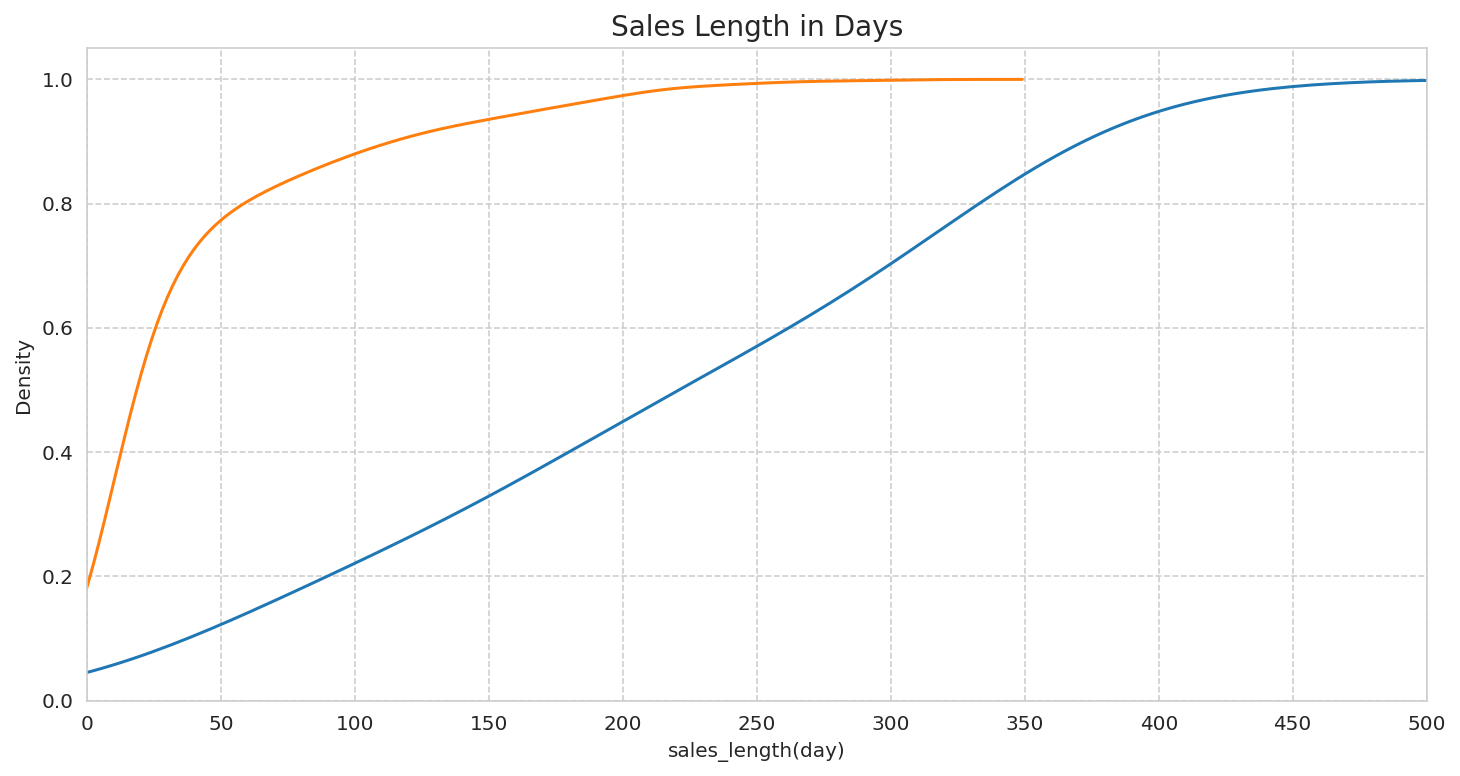

In [71]:
# Plot the sales length of each year
figure, ax = plt.subplots(figsize=(12,6))

sns.kdeplot(sales_length_2017,
            cumulative=True,
            label='2017 (Jun-Dec)',
            ax=ax)
sns.kdeplot(sales_length_2018,
            cumulative=True,
            label='2018 (Jan-May)',
            ax=ax)

ax.set_title('Sales Length in Days', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlim(0,500);

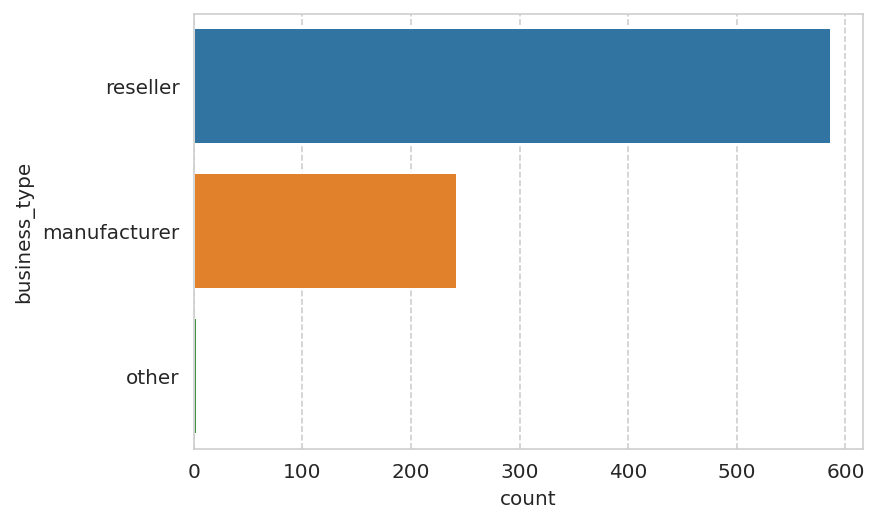

In [27]:
sns.countplot(y='business_type', data=cd_mql)

In [45]:
new_customers = cd_mql[["seller_id", "won_date", "business_segment", "business_type", "origin", "first_contact_date"]]

In [44]:
sellers = pd.read_csv("/content/drive/MyDrive/Datathon2022/data/olist_sellers_dataset.csv",dtype={'seller_zip_code_prefix': str})

In [46]:
new_customers = sellers.merge(new_customers)

In [47]:
new_customers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,won_date,business_segment,business_type,origin,first_contact_date
0,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21
1,05a48cc8859962767935ab9087417fbb,05372,sao paulo,SP,2018-05-30 03:00:00,fashion_accessories,reseller,unknown,2018-05-21
2,1444c08e64d55fb3c25f0f09c07ffcf2,42738,lauro de freitas,BA,2018-02-06 13:55:36,car_accessories,reseller,organic_search,2017-12-25
3,f9ec7093df3a7b346b7bcf7864069ca3,05138,sao paulo,SP,2018-05-11 17:09:22,small_appliances,reseller,paid_search,2018-05-08
4,e9e446d01bd10a97a8ffcfc4a3a20cb2,02261,sao paulo,SP,2018-04-27 16:11:57,health_beauty,reseller,social,2018-04-04
...,...,...,...,...,...,...,...,...,...
375,c70c1b0d8ca86052f45a432a38b73958,13186,hortolandia,SP,2018-03-13 21:39:34,health_beauty,reseller,paid_search,2018-03-13
376,9e6967d3cf386d284251784b18ccb485,09550,sao caetano do sul,SP,2018-04-13 13:41:51,construction_tools_house_garden,reseller,organic_search,2018-04-04
377,61b18775be84fb700a6b2d0ba097bf66,14808,araraquara,SP,2018-02-27 19:13:04,pet,reseller,paid_search,2018-02-26
378,e94b64dc6979b302a5a5be1662c83bb6,06852,itapecerica da serra,SP,2018-05-04 03:00:00,home_decor,reseller,organic_search,2018-04-25


In [48]:
geo = pd.read_csv("/content/drive/MyDrive/Datathon2022/data/olist_geolocation_dataset.csv",dtype={'geolocation_zip_code_prefix': str})

In [49]:
new_customers.merge(geo, how="left", left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix")  

,seller_id,seller_zip_code_prefix,seller_city,seller_state,won_date,business_segment,business_type,origin,first_contact_date,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21,13530,-22.249520,-47.811237,itirapina,SP
1,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21,13530,-22.246672,-47.808632,itirapina,SP
2,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21,13530,-22.256444,-47.820909,itirapina,SP
3,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21,13530,-22.253154,-47.821754,itirapina,SP
4,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21,13530,-22.231654,-47.719781,itirapina,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51319,f1fdf2d13186575751aa25876536d85c,05314,sao paulo,SP,2018-03-22 13:06:50,sports_leisure,reseller,organic_search,2018-03-15,05314,-23.534949,-46.733916,sao paulo,SP
51320,f1fdf2d13186575751aa25876536d85c,05314,sao paulo,SP,2018-03-22 13:06:50,sports_leisure,reseller,organic_search,2018-03-15,05314,-23.530074,-46.737718,são paulo,SP
51321,f1fdf2d13186575751aa25876536d85c,05314,sao paulo,SP,2018-03-22 13:06:50,sports_leisure,reseller,organic_search,2018-03-15,05314,-23.530064,-46.738214,sao paulo,SP
51322,f1fdf2d13186575751aa25876536d85c,05314,sao paulo,SP,2018-03-22 13:06:50,sports_leisure,reseller,organic_search,2018-03-15,05314,-23.529210,-46.732996,sao paulo,SP


In [64]:
new_customers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,won_date,business_segment,business_type,origin,first_contact_date
0,a7a9b880c49781da66651ccf4ba9ac38,13530,itirapina,SP,2018-04-25 21:02:03,bed_bath_table,reseller,paid_search,2018-03-21
1,05a48cc8859962767935ab9087417fbb,05372,sao paulo,SP,2018-05-30 03:00:00,fashion_accessories,reseller,unknown,2018-05-21
2,1444c08e64d55fb3c25f0f09c07ffcf2,42738,lauro de freitas,BA,2018-02-06 13:55:36,car_accessories,reseller,organic_search,2017-12-25
3,f9ec7093df3a7b346b7bcf7864069ca3,05138,sao paulo,SP,2018-05-11 17:09:22,small_appliances,reseller,paid_search,2018-05-08
4,e9e446d01bd10a97a8ffcfc4a3a20cb2,02261,sao paulo,SP,2018-04-27 16:11:57,health_beauty,reseller,social,2018-04-04
...,...,...,...,...,...,...,...,...,...
375,c70c1b0d8ca86052f45a432a38b73958,13186,hortolandia,SP,2018-03-13 21:39:34,health_beauty,reseller,paid_search,2018-03-13
376,9e6967d3cf386d284251784b18ccb485,09550,sao caetano do sul,SP,2018-04-13 13:41:51,construction_tools_house_garden,reseller,organic_search,2018-04-04
377,61b18775be84fb700a6b2d0ba097bf66,14808,araraquara,SP,2018-02-27 19:13:04,pet,reseller,paid_search,2018-02-26
378,e94b64dc6979b302a5a5be1662c83bb6,06852,itapecerica da serra,SP,2018-05-04 03:00:00,home_decor,reseller,organic_search,2018-04-25
